In [64]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import seaborn as sns  
import pydot
from sklearn import tree

In [66]:
#a)
# Define the number of examples.
N = 1000
# Create the dataset.
x, y = make_moons(n_samples = 10000, noise = 0.4, random_state=42)

#b)
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.25, random_state=42)

c)


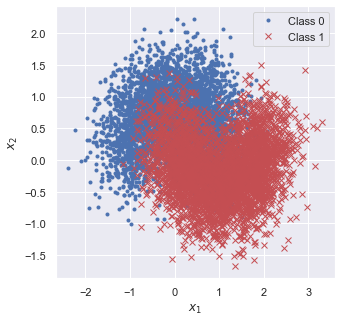

In [67]:
print('c)')
idx0 = np.argwhere(y_train == 0)
idx1 = np.argwhere(y_train == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x_train[idx0,0], x_train[idx0,1], '.', label='Class 0')
plt.plot(x_train[idx1,0], x_train[idx1,1], 'rx', label='Class 1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.savefig('distribution_of_classes', dpi=600)
plt.show()

In [68]:
dtr = DecisionTreeClassifier()
parameters = {'max_leaf_nodes' :[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}
print(parameters)
best = GridSearchCV(dtr, parameters, cv=5, verbose=3, n_jobs=-1)

best.fit(x_train, y_train)
print(best.best_params_)  # encontrar el mejor parámetro
print(best.best_score_)    

{'max_leaf_nodes': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.0s


{'max_leaf_nodes': 30}
0.8586666666666667


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.5s finished


In [69]:
# Create classifier.
clf = DecisionTreeClassifier(criterion='gini', max_leaf_nodes = 30)
# Fit the classifier on the training features and labels.
clf.fit(x_train, y_train)
# Use the trained classifier to predict labels for the test features.
y_pred = clf.predict(x_test)

# Calculate the accuracy on the test data 
print('Accuracy of model is:', accuracy_score(y_test, y_pred)*100, '%')

Accuracy of model is: 86.36 %


f)


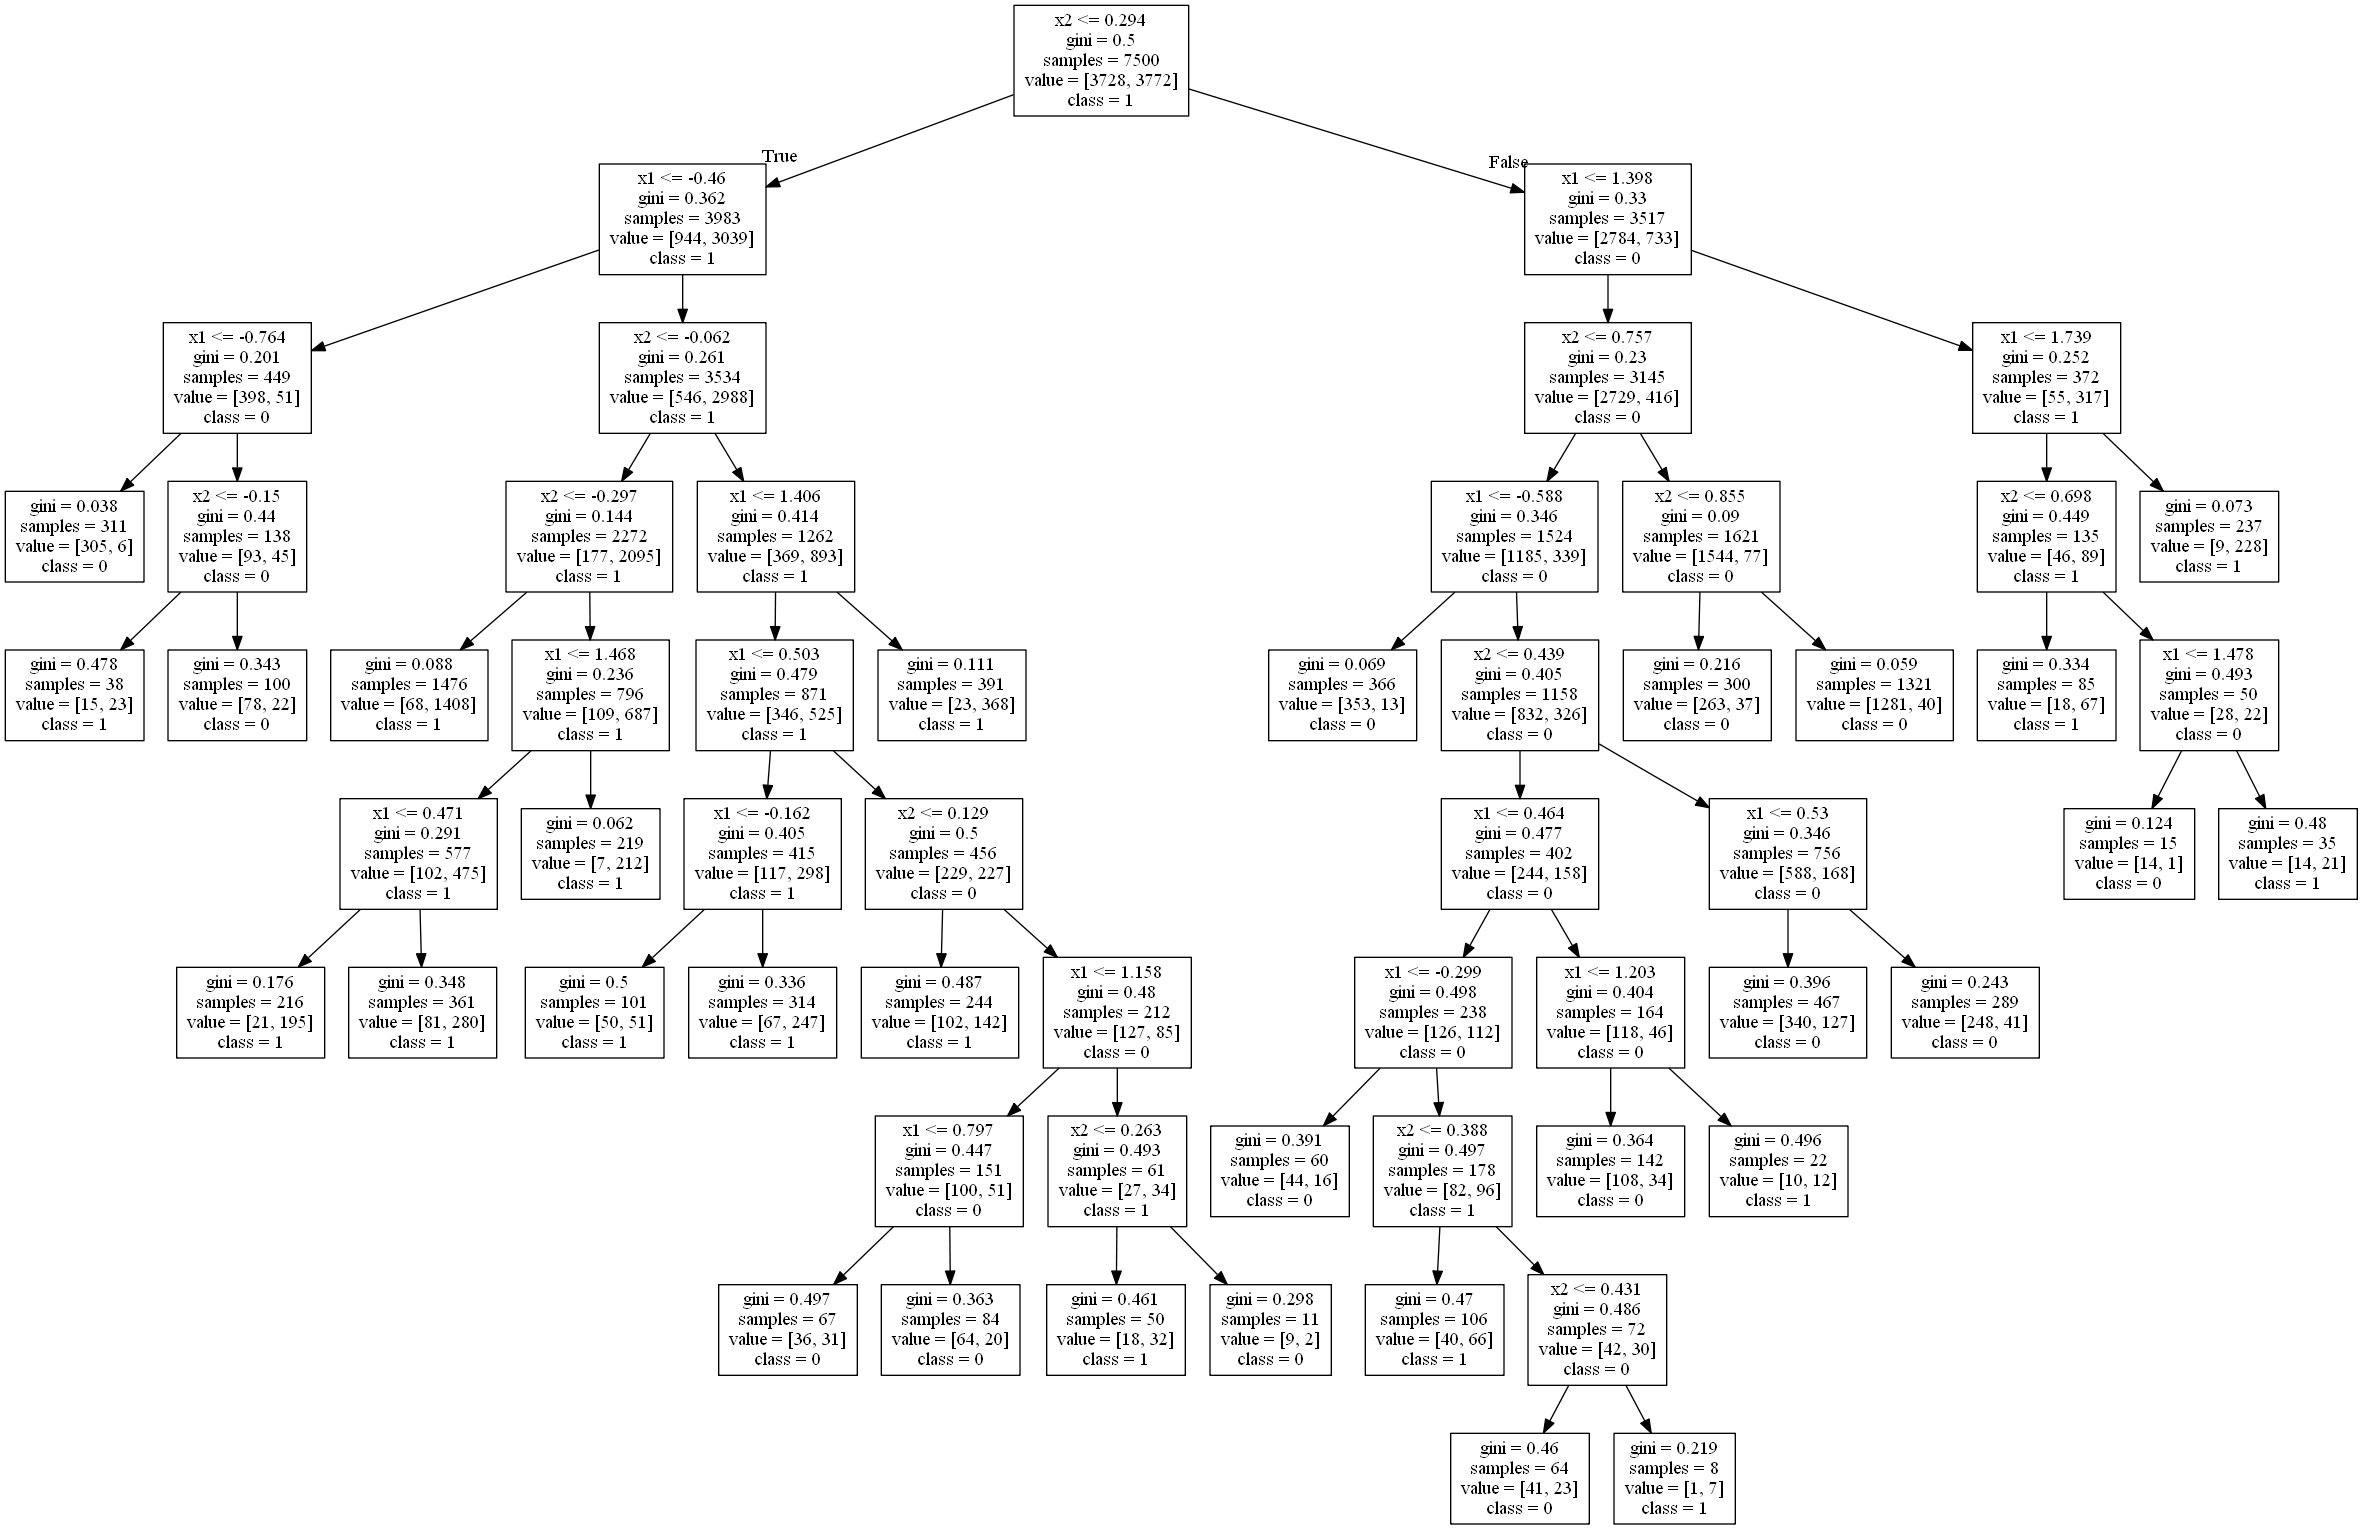

In [70]:
print('f)')
from IPython.display import Image  
from sklearn.externals.six import StringIO
# visualize the decision tree.
# you've got to have graphviz and pydot installed on your computer.
# Execute: conda install graphviz pydot
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data, class_names=['0','1'], feature_names=['x1','x2'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

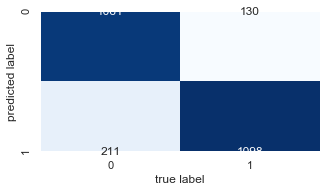

In [71]:
# Plot the confusion matrix.
fig = plt.figure(figsize=(5,5))
mat = confusion_matrix(y_test, y_pred)
sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=['0','1'], yticklabels=['0','1'], cmap="Blues")
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.savefig('confusion_matrix_dt.png', dpi=600)
plt.show()

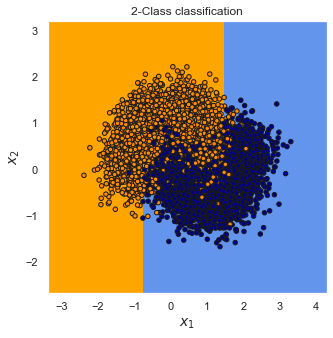

In [72]:
# Step size in the mesh.
h = .02 

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

plt.figure(figsize=(5, 5))
# Plot the decision boundary. For that, we will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points.
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.title("2-Class classification")

plt.savefig('decision_boundary_dt.png', dpi=600)
plt.show()

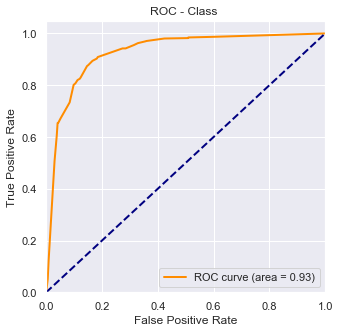

In [73]:
# Getting the probabilities for each class.
y_prob = clf.predict_proba(x_test)

# Compute ROC curve and ROC area for each class.
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
roc_auc = auc(fpr, tpr)
# Plotting ROC curve.
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Class ')
plt.legend(loc="lower right")

plt.savefig('roc_dt.png', dpi=600)
plt.show()